### Bayesian Linear Regression P152
#### Dummy data

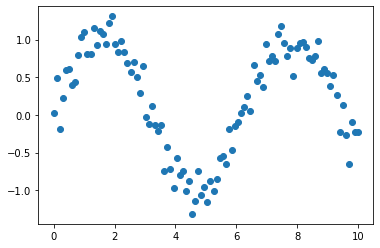

In [87]:
import numpy

import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0,10,100)
w = np.random.randn(100) * 0.2 # variance 0.2, precision=5
Y = np.sin(X) + w
Y_true = np.sin(X)

plt.scatter(X,Y)
plt.show()

#### Tuning data_num and precision to gain more insight.

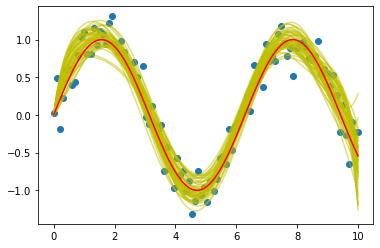

In [181]:
# feature space: (x, x**2, x**3, x**4), W.shape= (1,8)
X_feature = np.array([X, X**2,X**3, X**4, X**5, X**6, X**7, X**8])

class Bayes_Regression:
    def __init__(self):
        # random initialization of gaussian prior
        self.feature_dim = 8
        self.m0 = np.random.randn(1,self.feature_dim)
        self.S0 = np.random.randn(self.feature_dim,self.feature_dim)
        self.precision = 5
            
    def learn(self, data, label):
        # data is design matrix
        data_num = max(data.shape)
        data = data.reshape(self.feature_dim,data_num)
        label = label.reshape(data_num,)
        assert data.shape==(self.feature_dim,data_num)
        assert label.shape == (data_num,)
        self.SN = np.linalg.inv(np.linalg.inv(self.S0) + self.precision*data@data.T)
        self.mN = self.SN@(np.linalg.inv(self.S0)@self.m0.T +\
                           self.precision*np.matmul(data, label).reshape(self.feature_dim,1))
        
    def parameter_sample(self):
        # return a near positive semi-definite covariance matrix
        def get_near_psd(A):
            C = (A + A.T)/2
            eigval, eigvec = np.linalg.eig(C)
            eigval[eigval < 0] = 0

            return eigvec.dot(np.diag(eigval)).dot(eigvec.T)
        self.SN = get_near_psd(self.SN)
        W = np.random.multivariate_normal(np.squeeze(self.mN), self.SN)
        return W

# random data_num x data points
data_num = 100
index = np.random.randint(0,X_feature.shape[1],size=(data_num))
samples = X_feature[:,index]
Y_sam = Y[index]
BR = Bayes_Regression()
BR.learn(samples, Y_sam)

# 50 times realization
for _ in range(50):
    W = BR.parameter_sample()
    plt.plot(X, np.dot(W, X_feature), '-y', alpha=0.5)
plt.scatter(X, Y)
plt.plot(X, Y_true, '-r')
plt.show()